# Assignment 4
## ✅ Rename the filename with your roll number. E.g. if your roll number is `MT24003` then rename the file `MT24003_a4.ipynb`.
## ✅ Write code only in the sections marked with `# YOUR CODE HERE`. No, you can NOT write code anywhere else.
## ✅ Download and extract the `data.zip` folder next to this file. If you extract it correctly, you will have a `data` folder next to this file.

## ❌ Do not modify any other function or class definitions; doing so may lead to the autograder failing to judge your submission, resulting in a zero.
## ❌ Deleting or adding new cells may lead to the `autograder` failing to judge your submission, resulting in a zero. Even if a cell is empty, do NOT delete it.
## ❌ Do NOT install / import any other libraries. You should be able to solve all the questions using only the libraries imported below.

In [1]:
!pip install torch==2.1.2 torchvision==0.16.2 torchaudio==2.1.2 -q
!pip install numpy==1.25.2 -q
!pip install soundfile==0.13.0 -q
!pip install pandas==2.2.3 -q
!pip install matplotlib==3.9.4 -q
!pip install scikit-image==0.21.0 -q
!pip install tqdm==4.67.1 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.

In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# `Stock Price Prediction LSTM Model`
The task is to train an LSTM model to predict the stock price of `ASIANPAINT.NS`. Your model will be evaluated based on its ability to predict the stock price for the hourly closing price for 5 days after the submission deadline.

1. Collect your own data for stock prices.
   1. Feel free to collect data from any source you like. You can use APIs, web scraping (gotcha: look at robots.txt), or any other method to collect the data.
   2. Recommendation: dump data manually from [yahoofinance](https://finance.yahoo.com/chart/ASIANPAINT.NS?guccounter=1#eyJsYXlvdXQiOnsiaW50ZXJ2YWwiOjE1LCJwZXJpb2RpY2l0eSI6MSwidGltZVVuaXQiOiJtaW51dGUiLCJjYW5kbGVXaWR0aCI6NS45Mjg4NzAyOTI4ODcwMjksImZsaXBwZWQiOmZhbHNlLCJ2b2x1bWVVbmRlcmxheSI6dHJ1ZSwiYWRqIjp0cnVlLCJjcm9zc2hhaXIiOnRydWUsImNoYXJ0VHlwZSI6Im1vdW50YWluIiwiZXh0ZW5kZWQiOnRydWUsIm1hcmtldFNlc3Npb25zIjp7fSwiYWdncmVnYXRpb25UeXBlIjoib2hsYyIsImNoYXJ0U2NhbGUiOiJsaW5lYXIiLCJzdHVkaWVzIjp7InZvbCB1bmRyIjp7InR5cGUiOiJ2b2wgdW5kciIsImlucHV0cyI6eyJTZXJpZXMiOiJzZXJpZXMiLCJpZCI6InZvbCB1bmRyIiwiZGlzcGxheSI6InZvbCB1bmRyIn0sIm91dHB1dHMiOnsiVXAgVm9sdW1lIjoiIzBkYmQ2ZWVlIiwiRG93biBWb2x1bWUiOiIjZmY1NTQ3ZWUifSwicGFuZWwiOiJjaGFydCIsInBhcmFtZXRlcnMiOnsiY2hhcnROYW1lIjoiY2hhcnQiLCJlZGl0TW9kZSI6dHJ1ZSwicGFuZWxOYW1lIjoiY2hhcnQifSwiZGlzYWJsZWQiOmZhbHNlfX0sInBhbmVscyI6eyJjaGFydCI6eyJwZXJjZW50IjoxLCJkaXNwbGF5IjoiQVNJQU5QQUlOVC5OUyIsImNoYXJ0TmFtZSI6ImNoYXJ0IiwiaW5kZXgiOjAsInlBeGlzIjp7Im5hbWUiOiJjaGFydCIsInBvc2l0aW9uIjpudWxsfSwieWF4aXNMSFMiOltdLCJ5YXhpc1JIUyI6WyJjaGFydCIsInZvbCB1bmRyIl19fSwic2V0U3BhbiI6e30sIm91dGxpZXJzIjpmYWxzZSwiYW5pbWF0aW9uIjp0cnVlLCJoZWFkc1VwIjp7InN0YXRpYyI6dHJ1ZSwiZHluYW1pYyI6ZmFsc2UsImZsb2F0aW5nIjpmYWxzZX0sImxpbmVXaWR0aCI6MiwiZnVsbFNjcmVlbiI6dHJ1ZSwic3RyaXBlZEJhY2tncm91bmQiOnRydWUsImNvbG9yIjoiIzAwODFmMiIsImNyb3NzaGFpclN0aWNreSI6ZmFsc2UsInN5bWJvbHMiOlt7InN5bWJvbCI6IkFTSUFOUEFJTlQuTlMiLCJzeW1ib2xPYmplY3QiOnsic3ltYm9sIjoiQVNJQU5QQUlOVC5OUyIsInF1b3RlVHlwZSI6IkVRVUlUWSIsImV4Y2hhbmdlVGltZVpvbmUiOiJBc2lhL0tvbGthdGEiLCJwZXJpb2QxIjoxNzM4MjI2NzAwLCJwZXJpb2QyIjoxNzQwNjg0NjAwfSwicGVyaW9kaWNpdHkiOjEsImludGVydmFsIjoxNSwidGltZVVuaXQiOiJtaW51dGUiLCJzZXRTcGFuIjp7fX1dLCJyYW5nZSI6e319LCJldmVudHMiOnsiZGl2cyI6dHJ1ZSwic3BsaXRzIjp0cnVlLCJ0cmFkaW5nSG9yaXpvbiI6Im5vbmUiLCJzaWdEZXZFdmVudHMiOltdfSwicHJlZmVyZW5jZXMiOnsiY3VycmVudFByaWNlTGluZSI6dHJ1ZSwiZGlzcGxheUNyb3NzaGFpcnNXaXRoRHJhd2luZ1Rvb2wiOmZhbHNlLCJkcmF3aW5ncyI6bnVsbCwiaGlnaGxpZ2h0c1JhZGl1cyI6MTAsImhpZ2hsaWdodHNUYXBSYWRpdXMiOjMwLCJtYWduZXQiOmZhbHNlLCJob3Jpem9udGFsQ3Jvc3NoYWlyRmllbGQiOm51bGwsImxhYmVscyI6dHJ1ZSwibGFuZ3VhZ2UiOm51bGwsInRpbWVab25lIjoiQXNpYS9Lb2xrYXRhIiwid2hpdGVzcGFjZSI6NTAsInpvb21JblNwZWVkIjpudWxsLCJ6b29tT3V0U3BlZWQiOm51bGwsInpvb21BdEN1cnJlbnRNb3VzZVBvc2l0aW9uIjpmYWxzZX19) or use [yfinance](https://github.com/ranaroussi/yfinance) library.
   3. For simplicity, you can consider the Indian stock market timings (9:15 to 15:15) from Monday to Friday. After Friday, you may / may not consider the data for Saturday and Sunday, i.e. either skip the 2 days or append zeros for the period of 2 days.
   4. You may also encounter weekdays when the stock market is closed. Again, you can either skip these days or append zeros for the entire day.

2. Train the `StockPriceLSTM` model using the data you collected.
   1. **You MUST** use the `StockPriceLSTM` class defined below. Fill in the code where it says `# YOUR CODE HERE`.
   2. **You MUST** use `torch.nn.LSTM` layer to implement the model. Additionally, you can use any other layers that you think are necessary except mordern sequence modelling architectures like transformers or its variants.
   3. **You MUST** implement the input to the model such that it accepts a sequence of stock prices. This sequence can be of any length. Thus, you must forecast the stock price in an autoregressive manner.
   4. **You MUST** call the `save_model_weights` method of the `StockPriceLSTM` class to save your model weights. The model weights will be used to evaluate your model. Missing this step will result in a zero.
   5. Optionally, you can fill code in `preprocess_data` method to implement any data preprocessing steps. And, `postprocess_data` method to implement any prediction postprocessing steps.
   6. Your model will be evaluated at predicting the 15-minute closing price (from 9:15 to 15:15) for the period of next 5 days (i.e. 5*25=125 values). Attached files `past_5_days.csv` and `next_5_days.csv` contain dummy values for now. After submission, these files will be replaces with fresh market from before the submission deadline and 5 days after the submission deadline. So you will be able to see the performance of your model with live data!
   7. Run the `sanity_check` function to ensure that your model runs correctly. The function will plot the predicted stock prices for the next 5 days given the dummy data. So while the MSE score may not be very good, you can at least check if your pipeline is running correctly.
   8. You can use any optimizer, hyperparameters, etc.
   9. You can use any data preprocessing steps.

3. Submit a single .zip file with the following files:
   * ```
        changerollno_a4.zip
            ├── changerollno_a4.ipynb
            └── trained_lstm.pth
    ```

**GRADING** [Total: 5]
1. `1` point if the code in the cell marked with `# tests for StockPriceLSTM` runs without any errors on hidden test cases, otherwise `0` points. No partial points for this question.
2. Performance based on the MSE score of the model on the test data.
   * `4` points if MSE < 20
   * `3` points if 20 <= MSE < 100
   * `2` points if 100 <= MSE < 1000
   * `1` point if 1000 <= MSE < 5000
   * `0` points if MSE >= 5000

In [3]:
class StockPriceLSTM(torch.nn.Module):
    def __init__(self):
        super(StockPriceLSTM, self).__init__()
        # YOUR CODE HERE
        # raise NotImplementedError()
        self.hidden_size = 100
        self.lstm = torch.nn.LSTM(input_size=1, hidden_size=self.hidden_size, num_layers=2, batch_first=True)
        self.fc = torch.nn.Linear(self.hidden_size, 1)
        self.register_buffer('data_mean', torch.tensor(0.0))
        self.register_buffer('data_std', torch.tensor(1.0))

    def forward(self, x):
        """Forward function must accept a tensor of any length and return a floating
            point number representing the forecasted value for the next time step.

        Args:
            x (torch.Tensor): A tensor of shape (batch_size, sequence_length, input_size) NOTE: the sequence_length can be variable.

        Returns:
            float: The forecasted value for the next time step.
        """
        # YOUR CODE HERE
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out.squeeze()

    def preprocess_data(self, data):
        """Optional method to preprocess the data before training the model.

        Args:
            data (np.array): A numpy array of shape (num_samples,) containing the raw data.

        Returns:
            np.array: A numpy array of shape (num_samples,) containing the preprocessed data.
        """
        # YOUR CODE HERE
        data = data.astype(np.float32)
        if self.training:
            mean = data.mean()
            std = data.std() if data.std() != 0 else 1.0  # Avoid division by zero.
            self.data_mean = torch.tensor(mean, dtype=torch.float32)
            self.data_std = torch.tensor(std, dtype=torch.float32)
        else:
            mean = self.data_mean.item()
            std = self.data_std.item()
        return ((data - mean) / std).astype(np.float32)

    def postprocess_data(self, data):
        """Optional method to postprocess the data after training the model.

        Args:
            data (np.array): A numpy array of shape (num_samples,) containing the model's predictions.

        Returns:
            np.array: A numpy array of shape (num_samples,) containing the postprocessed data.
        """
        # YOUR CODE HERE
        mean = self.data_mean.item()
        std = self.data_std.item()
        return data * std + mean

    def save_model_weights(self):
        torch.save(self.state_dict(), "trained_lstm.pth")

    def load_model_weights(self):
        self.load_state_dict(torch.load("trained_lstm.pth"))

    def predict_for_next_5_days(self):
        df_last_5_days = pd.read_csv('past_5_days.csv')
        raw_last_5_days = df_last_5_days.loc[:, "Close"].values
        try:
            last_5_days = self.preprocess_data(raw_last_5_days)
        except:
            print("no preprocessing")
        last_5_days_datetime = df_last_5_days.loc[:, "Datetime"].values
        df_next_5_days = pd.read_csv('next_5_days.csv')
        next_5_days = df_next_5_days.loc[:, "Close"].values
        next_5_days_datetime = df_next_5_days.loc[:, "Datetime"].values
        predictions = []

        self.eval()
        with torch.no_grad():
            input_sequence = last_5_days.copy()

            for _ in range(5*25):
                x = torch.FloatTensor(input_sequence[-5*25:]).unsqueeze(0).unsqueeze(-1)

                next_value = self(x).item()
                predictions.append(next_value)

                input_sequence = np.append(input_sequence, next_value)

            try:
                predictions = self.postprocess_data(np.array(predictions))
            except:
                print("no postprocessing")
            plt.figure(figsize=(10, 5))
            sequence_length = len(last_5_days)
            prediction_length = len(predictions)

            past_indices = np.arange(0, sequence_length)
            plt.plot(past_indices, raw_last_5_days, 'b-', label='Past 5 Days (5*25 values)')

            future_indices = np.arange(sequence_length, sequence_length + prediction_length)
            plt.plot(future_indices, predictions, 'r--', label='Predicted Next 5 Days')

            if next_5_days is not None:
                plt.plot(future_indices, next_5_days, 'g-', label='Actual Next 5 Days')
                mse = np.mean((np.array(predictions) - next_5_days) ** 2)
                plt.title(f'LSTM Autoregressive Prediction (MSE: {mse:.4f})')
                print(f'MSE: {mse:.4f}')
            else:
                plt.title('LSTM Autoregressive Prediction')

            plt.axvline(x=sequence_length-1, color='k', linestyle='--', alpha=0.3)
            plt.legend()
            plt.xlabel('Time Steps')
            plt.ylabel('Value')
            xticks = np.concatenate([last_5_days_datetime, next_5_days_datetime])
            plt.xticks(np.arange(0, len(xticks), 25), xticks[::25], rotation=45)
            plt.tight_layout()
            plt.savefig('lstm_prediction.png')
            plt.show()

            return mse

In [4]:
# tests for StockPriceLSTM

stock_price_lstm = StockPriceLSTM()


In [8]:
# Use this cell to train your model. ⚠️ Remember to save the model weights by calling `save_model_weights()`
# YOUR CODE HERE



df_train = pd.read_csv('past_5_days.csv')
prices = df_train['Close'].values

model = StockPriceLSTM()

model.train()
prices_processed = model.preprocess_data(prices)

window_size = 50
X_train = []
y_train = []
for i in range(len(prices_processed) - window_size):
    X_train.append(prices_processed[i:i+window_size])
    y_train.append(prices_processed[i+window_size])

X_train = np.array(X_train)  #size)
y_train = np.array(y_train)  #amples,)


X_train_tensor = torch.FloatTensor(X_train).unsqueeze(-1)
y_train_tensor = torch.FloatTensor(y_train)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    #  loss on the normalized scale
    # and MSE on the original data scale.
    if (epoch+1) % 20 == 0:
        predictions_norm = outputs.detach().cpu().numpy()
        y_train_norm = y_train_tensor.detach().cpu().numpy()

        #model's postprocess_data method to convert them to the original scale.
        predictions_orig = model.postprocess_data(predictions_norm)
        y_train_orig = model.postprocess_data(y_train_norm)

        mse_orig = np.mean((predictions_orig - y_train_orig) ** 2)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss (normalized): {loss.item():.4f}, MSE (original): {mse_orig:.4f}')

# Save the model weights.
model.save_model_weights()



Epoch [20/1000], Loss (normalized): 0.4037, MSE (original): 206.5660
Epoch [40/1000], Loss (normalized): 0.1946, MSE (original): 99.5963
Epoch [60/1000], Loss (normalized): 0.1495, MSE (original): 76.5109
Epoch [80/1000], Loss (normalized): 0.1305, MSE (original): 66.7969
Epoch [100/1000], Loss (normalized): 0.1087, MSE (original): 55.6465
Epoch [120/1000], Loss (normalized): 0.0660, MSE (original): 33.7920
Epoch [140/1000], Loss (normalized): 0.0466, MSE (original): 23.8256
Epoch [160/1000], Loss (normalized): 0.0409, MSE (original): 20.9048
Epoch [180/1000], Loss (normalized): 0.0335, MSE (original): 17.1321
Epoch [200/1000], Loss (normalized): 0.0305, MSE (original): 15.6072
Epoch [220/1000], Loss (normalized): 0.0267, MSE (original): 13.6457
Epoch [240/1000], Loss (normalized): 0.0233, MSE (original): 11.9055
Epoch [260/1000], Loss (normalized): 0.0212, MSE (original): 10.8649
Epoch [280/1000], Loss (normalized): 0.0201, MSE (original): 10.3093
Epoch [300/1000], Loss (normalized): 

In [9]:
def sanity_check():
    model = StockPriceLSTM()
    model.load_model_weights()
    mse = model.predict_for_next_5_days() # this mse does not represent the actual performance of the model

MSE: 1339.9469


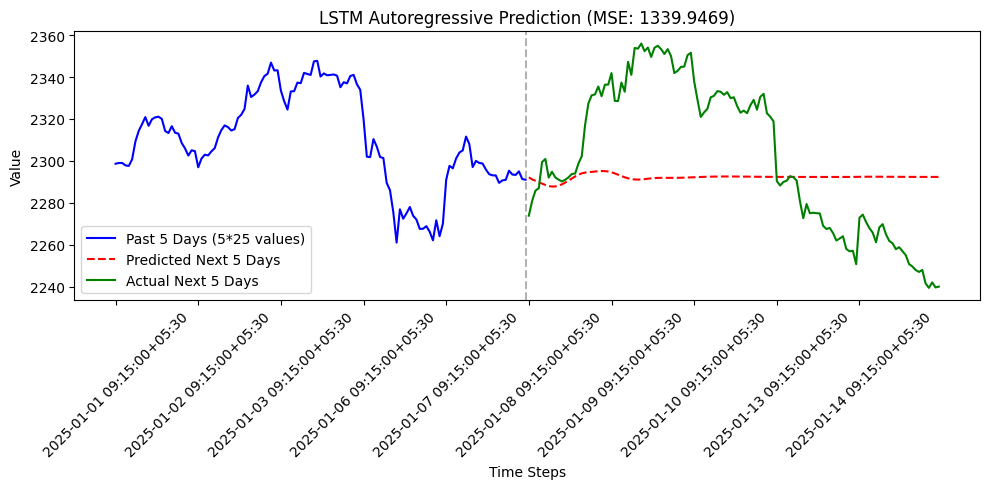

In [10]:
sanity_check()